# DSCI 100 Group Project Proposal: Bank Marketing Classification

### 1. Introduction

### 2. Preliminary Exploratory Data Analysis
#### Reading the Data

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [22]:
#LOADED HEART DISEASE DATA
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_data <- read_delim(url,
                           col_names = c("age", "sex", "cp", "trestbps", 
                                         "chol", "fbs", "restecg", "thalach", 
                                         "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Table 1: Heart Disease Dataset from the Web*

In [26]:
tidy_heart_data <- heart_data |>
    rename(diagnosis = num) |>
    mutate(diagnosis = as_factor(diagnosis),
           diagnosis = case_when(diagnosis %in% c(1, 2, 3, 4) ~ "Yes", diagnosis %in% 0 ~ "No"))

heart_split <- initial_split(tidy_heart_data,
                            prop = 0.75,
                            strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,No
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Yes
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Yes


*Table 2: Training Data Set*

#### Summary Statistics

In [32]:
missing_values <- data.frame(missing_values = sum(is.na(heart_train)))
missing_values

missing_values
<int>
0


*Table 3: Summary Table on Missing Values in the Data Set*

In [29]:
number_obs <- nrow(heart_train)
            heart_train |>
            group_by(diagnosis) |>
            summarize(Count = n(), Percentage = n() / number_obs * 100)

diagnosis,Count,Percentage
<chr>,<int>,<dbl>
No,123,54.18502
Yes,104,45.81498


*Table 4: Summary Table on Variable Distribution*

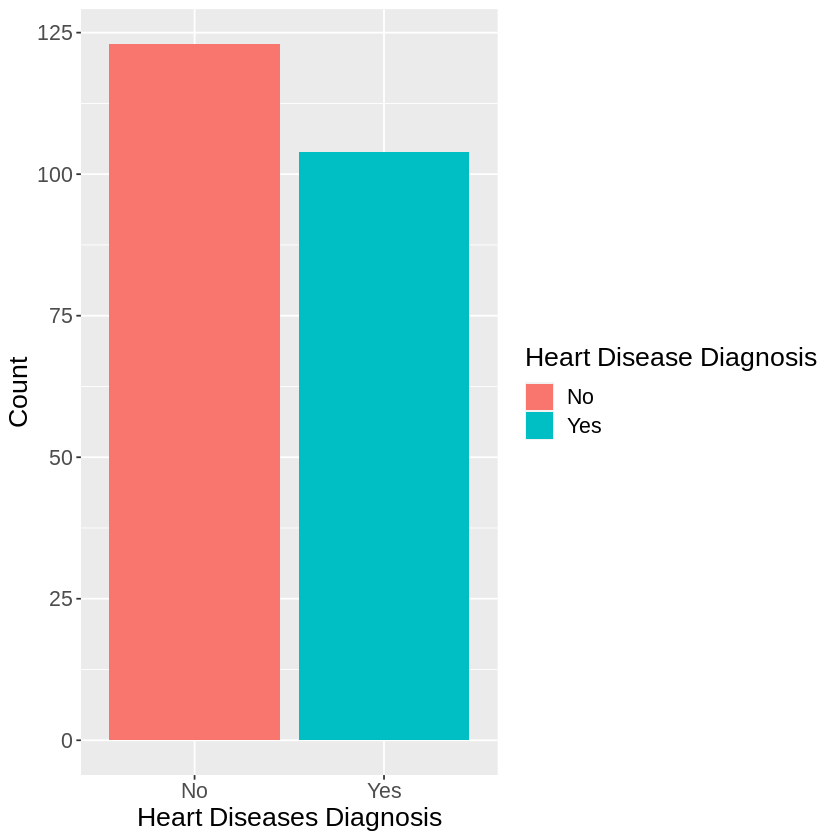

In [34]:
distribution_plot <- ggplot(heart_train, aes(x = diagnosis, fill = diagnosis)) +
            geom_bar(stat = "Count") +
            labs(x = "Heart Diseases Diagnosis", y = "Count", fill = "Heart Disease Diagnosis") +
            theme(text = element_text(size = 16))                 
distribution_plot

*Figure 5: Distribution of Marketing Success*

### 4. Methods

### 5. Expected Outcome and Significance

### References

Aha, D. W. (1988). Heart Disease Data Set [Data set]. UCI: Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease